In [28]:
import pandas as pd

df = pd.read_csv(fr"job_details_it_processed.csv")

In [29]:
df.head()

,Field,Experience,Location,Company Size,Salary,Job Requirements,URL,Experience_year,minSalary,maxSalary
0,Marketing / Truyền thông / Quảng cáo,Không yêu cầu,Hà Nội,25-99 nhân viên,Thoả thuận,Yêu cầu ứng viên Sinh viên có nhu cầu thực tập...,https://www.topcv.vn/viec-lam/intern-thiet-ke-...,0,TBD,TBD
1,Marketing / Truyền thông / Quảng cáo,1 năm,Hà Nội,10-24 nhân viên,10 - 20 triệu,Yêu cầu ứng viên Nam/ nữ. Tuổi dưới 36 Sử dụng...,https://www.topcv.vn/viec-lam/thiet-ke-3d-mang...,1,10.0,20.0
2,Thương mại điện tử,1 năm,Hà Nội,100-499 nhân viên,Thoả thuận,Yêu cầu ứng viên Có từ 1 2 năm kinh nghiệm tro...,https://www.topcv.vn/viec-lam/devops-engineer-...,1,TBD,TBD
3,IT - Phần mềm,3 năm,Hà Nội,25-99 nhân viên,18 - 22 triệu,"Yêu cầu ứng viên Là Mữ, có tối thiểu 3 năm kin...",https://www.topcv.vn/viec-lam/tester-leader/16...,3,18.0,22.0
4,Dược phẩm / Y tế / Công nghệ sinh học,1 năm,Hà Nội,25-99 nhân viên,12 - 15 triệu,Yêu cầu ứng viên Độ tuổi yêu cầu: từ 22 35 tuổ...,https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,1,12.0,15.0


In [30]:
import pandas as pd

def convert_experience(exp_str):
    if pd.isna(exp_str) or exp_str == 'N/A':
        return None
    
    # Handle "Không yêu cầu" (No requirement)
    if exp_str == 'Không yêu cầu':
        return 0
    
    # Handle "Dưới 1 năm" (Less than 1 year)
    if exp_str == 'Dưới 1 năm':
        return 0.5
    
    # Handle "Trên 5 năm" (More than 5 years)
    if exp_str == 'Trên 5 năm':
        return 6
    
    # Extract numeric value from strings like "1 năm", "2 năm", etc.
    try:
        # Split the string and get the first part (number)
        num = float(exp_str.split()[0])
        return num
    except:
        return None

# Read the CSV file
# df = pd.read_csv('data/job_details2.csv')

# Create a new column with numeric experience values
df['Experience_Numeric'] = df['Experience'].apply(convert_experience)

In [31]:
import re
import numpy as np

def convert_company_size(size_str):
    if pd.isna(size_str) or size_str == 'N/A':
        return np.nan
    
    if '1-9' in size_str:
        return 5  # midpoint of 1-9
    elif '10-24' in size_str:
        return 17  # midpoint of 10-24
    elif '25-99' in size_str:
        return 62  # midpoint of 25-99
    elif '100-499' in size_str:
        return 300  # midpoint of 100-499
    elif '500-1000' in size_str:
        return 750  # midpoint of 500-1000
    elif '1000+' in size_str:
        return 1500  # representative value for 1000+
    elif '3000+' in size_str:
        return 4000  # representative value for 3000+
    elif '5000+' in size_str:
        return 6000  # representative value for 5000+
    elif '10000+' in size_str:
        return 15000  # representative value for 10000+
    else:
        return np.nan
    
def convert_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'N/A' or salary_str == 'Thoả thuận':
        return np.nan
    
    # Check for USD values and convert to VND (rough conversion ~23000 VND per USD)
    if 'USD' in salary_str:
        # Extract USD values
        usd_values = re.findall(r'(\d+(?:,\d+)?(?:\.\d+)?)', salary_str)
        if len(usd_values) == 1:
            return float(usd_values[0].replace(',', '')) * 0.025
        elif len(usd_values) == 2:
            min_val = float(usd_values[0].replace(',', ''))
            max_val = float(usd_values[1].replace(',', ''))
            return ((min_val + max_val) / 2) * 0.025  # Average in USD * 25 (million VND)
        return np.nan
    
    # Extract numeric values from salary ranges in millions VND
    values = re.findall(r'(\d+(?:,\d+)?(?:\.\d+)?)', salary_str)
    if len(values) == 0:
        return np.nan
    elif len(values) == 1:
        if 'Từ' in salary_str or 'Tới' in salary_str:
            return float(values[0].replace(',', ''))
        else:
            return float(values[0].replace(',', ''))
    elif len(values) == 2:
        min_val = float(values[0].replace(',', ''))
        max_val = float(values[1].replace(',', ''))
        return (min_val + max_val) / 2  # Return average value
    
    return np.nan

In [32]:
import pandas as pd
import re

def clean_location(loc_str):
    if pd.isna(loc_str) or loc_str == 'N/A':
        return None
    
    # Handle cases with "& X nơi khác"
    if '&' in loc_str and 'nơi khác' in loc_str:
        # Extract the first location before "&"
        return loc_str.split('&')[0].strip()
    
    # Handle multiple locations separated by commas
    if ',' in loc_str:
        # Split by comma and clean each location
        locations = [loc.strip() for loc in loc_str.split(',')]
        return locations
    
    # Single location
    return loc_str.strip()

def create_location_columns(df):
    # Create a copy of the dataframe to avoid modifying the original
    df_clean = df.copy()
    
    # Clean the location column
    df_clean['Location_Clean'] = df_clean['Location'].apply(clean_location)
    
    # Get all unique locations
    all_locations = set()
    for locs in df_clean['Location_Clean'].dropna():
        if isinstance(locs, list):
            all_locations.update(locs)
        else:
            all_locations.add(locs)
    
    # Create a column for each location
    for loc in all_locations:
        df_clean[f'Location_{loc}'] = df_clean['Location_Clean'].apply(
            lambda x: 1 if (isinstance(x, list) and loc in x) or x == loc else 0
        )
    
    return df_clean


# Create the location columns
df = create_location_columns(df)

In [33]:
# Apply transformations
df['Company_Size_Numeric'] = df['Company Size'].apply(convert_company_size)
df['Salary_Numeric'] = df['Salary'].apply(convert_salary)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Field                     3622 non-null   object 
 1   Experience                3622 non-null   object 
 2   Location                  3622 non-null   object 
 3   Company Size              3622 non-null   object 
 4   Salary                    3622 non-null   object 
 5   Job Requirements          3622 non-null   object 
 6   URL                       3622 non-null   object 
 7   Experience_year           3622 non-null   int64  
 8   minSalary                 3622 non-null   object 
 9   maxSalary                 3622 non-null   object 
 10  Experience_Numeric        3622 non-null   float64
 11  Location_Clean            3622 non-null   object 
 12  Location_Nhật Bản         3622 non-null   int64  
 13  Location_Vĩnh Phúc        3622 non-null   int64  
 14  Location

In [35]:
df.head(5)

,Field,Experience,Location,Company Size,Salary,Job Requirements,URL,Experience_year,minSalary,maxSalary,...,Location_Cần Thơ,Location_Thanh Hoá,Location_Long An,Location_Gia Lai,Location_Bình Dương,Location_Phú Thọ,Location_Đà Nẵng,Location_Bắc Ninh,Company_Size_Numeric,Salary_Numeric
0,Marketing / Truyền thông / Quảng cáo,Không yêu cầu,Hà Nội,25-99 nhân viên,Thoả thuận,Yêu cầu ứng viên Sinh viên có nhu cầu thực tập...,https://www.topcv.vn/viec-lam/intern-thiet-ke-...,0,TBD,TBD,...,0,0,0,0,0,0,0,0,62.0,NaN
1,Marketing / Truyền thông / Quảng cáo,1 năm,Hà Nội,10-24 nhân viên,10 - 20 triệu,Yêu cầu ứng viên Nam/ nữ. Tuổi dưới 36 Sử dụng...,https://www.topcv.vn/viec-lam/thiet-ke-3d-mang...,1,10.0,20.0,...,0,0,0,0,0,0,0,0,17.0,15.0
2,Thương mại điện tử,1 năm,Hà Nội,100-499 nhân viên,Thoả thuận,Yêu cầu ứng viên Có từ 1 2 năm kinh nghiệm tro...,https://www.topcv.vn/viec-lam/devops-engineer-...,1,TBD,TBD,...,0,0,0,0,0,0,0,0,300.0,NaN
3,IT - Phần mềm,3 năm,Hà Nội,25-99 nhân viên,18 - 22 triệu,"Yêu cầu ứng viên Là Mữ, có tối thiểu 3 năm kin...",https://www.topcv.vn/viec-lam/tester-leader/16...,3,18.0,22.0,...,0,0,0,0,0,0,0,0,62.0,20.0
4,Dược phẩm / Y tế / Công nghệ sinh học,1 năm,Hà Nội,25-99 nhân viên,12 - 15 triệu,Yêu cầu ứng viên Độ tuổi yêu cầu: từ 22 35 tuổ...,https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,1,12.0,15.0,...,0,0,0,0,0,0,0,0,62.0,13.5


In [36]:
df = df.dropna(axis=0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1 to 3621
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Field                     2240 non-null   object 
 1   Experience                2240 non-null   object 
 2   Location                  2240 non-null   object 
 3   Company Size              2240 non-null   object 
 4   Salary                    2240 non-null   object 
 5   Job Requirements          2240 non-null   object 
 6   URL                       2240 non-null   object 
 7   Experience_year           2240 non-null   int64  
 8   minSalary                 2240 non-null   object 
 9   maxSalary                 2240 non-null   object 
 10  Experience_Numeric        2240 non-null   float64
 11  Location_Clean            2240 non-null   object 
 12  Location_Nhật Bản         2240 non-null   int64  
 13  Location_Vĩnh Phúc        2240 non-null   int64  
 14  Location_Thái

Number of jobs by location (excluding zero counts):
Hà Nội             1590
Hồ Chí Minh         603
Đà Nẵng              27
Hưng Yên             10
Đồng Nai              8
Bình Dương            7
Cần Thơ               7
Hải Phòng             6
Nghệ An               5
Bắc Ninh              4
Long An               4
Thừa Thiên Huế        4
Gia Lai               3
Bà Rịa-Vũng Tàu       3
Thái Nguyên           3
Khánh Hoà             2
Nhật Bản              1
Lâm Đồng              1
Bình Thuận            1
Đắk Lắk               1
Bắc Giang             1
Thanh Hoá             1
Phú Thọ               1
dtype: int64


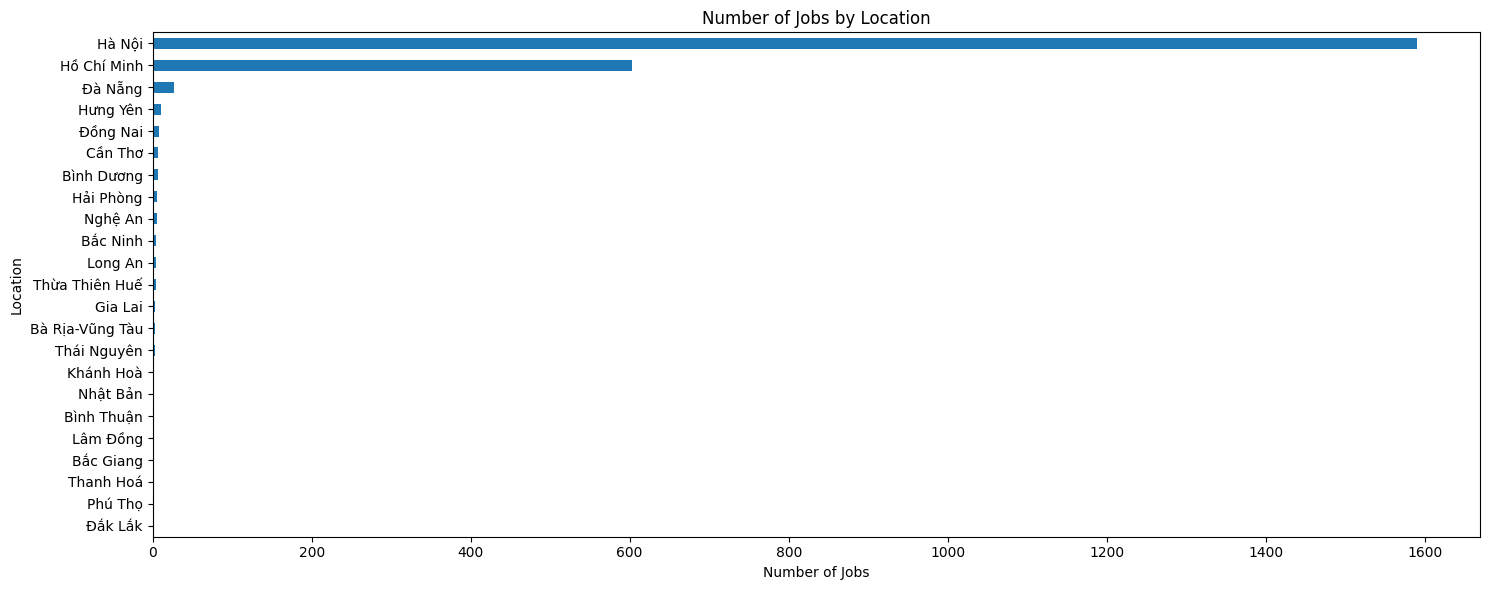

In [38]:
import matplotlib.pyplot as plt

# Get location counts and filter out zeros
location_counts = {}
for col in df.columns:
    if col.startswith('Location_') and col != 'Location_Clean':
        count = df[col].sum()
        if count > 0:  # Only include locations with count > 0
            location_counts[col.replace('Location_', '')] = count

# Sort the counts in descending order
sorted_counts = pd.Series(location_counts).sort_values(ascending=False)

# Print the counts
print("Number of jobs by location (excluding zero counts):")
print(sorted_counts)

# Create the bar plot
plt.figure(figsize=(15, 6))
sorted_counts.sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Jobs by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

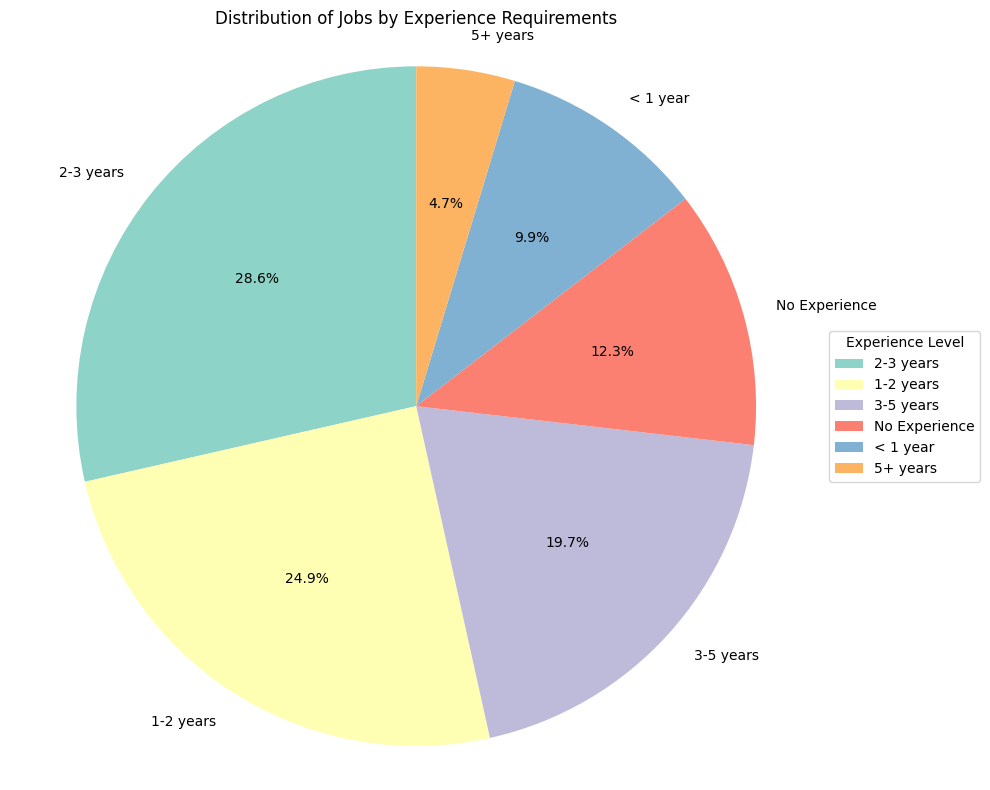

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

def categorize_experience(exp):
    if pd.isna(exp):
        return 'N/A'
    if exp == 0:
        return 'No Experience'
    if exp < 1:
        return '< 1 year'
    if exp < 2:
        return '1-2 years'
    if exp < 3:
        return '2-3 years'
    if exp < 5:
        return '3-5 years'
    return '5+ years'

df['Experience_Category'] = df['Experience_Numeric'].apply(categorize_experience)
experience_counts = df['Experience_Category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(experience_counts.values, 
        labels=experience_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3"))

plt.title('Distribution of Jobs by Experience Requirements')
plt.axis('equal')

# Add a legend
plt.legend(experience_counts.index, 
          title="Experience Level",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

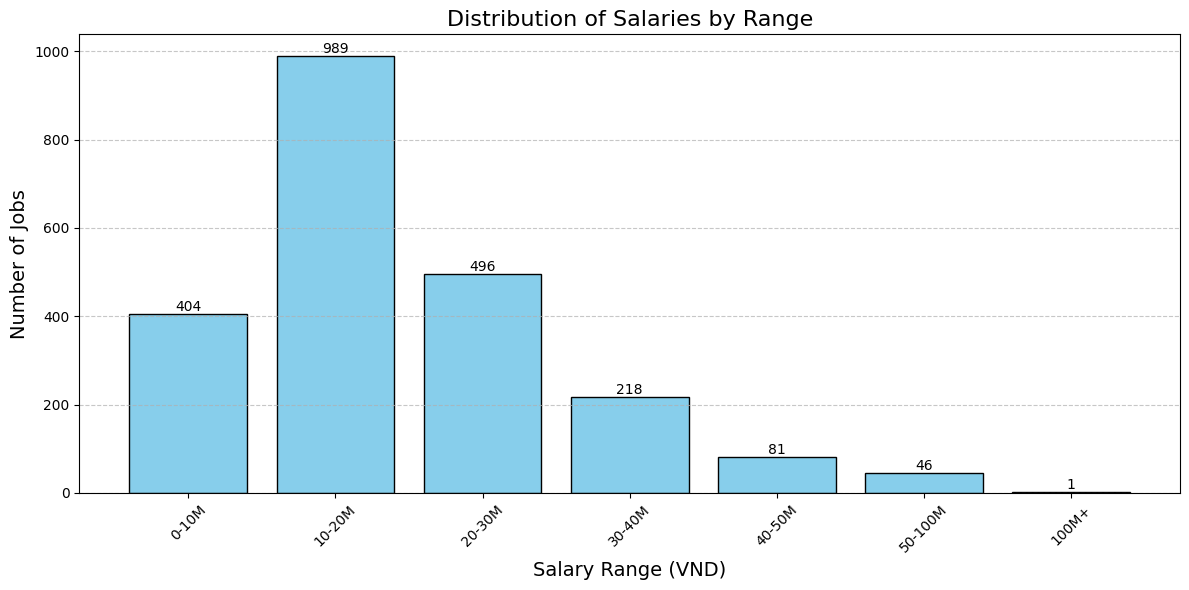

In [40]:
import matplotlib.pyplot as plt

# Define the salary ranges
salary_bins = [0, 10, 20, 30, 40, 50, 100, float('inf')]
salary_labels = ['0-10M', '10-20M', '20-30M', '30-40M', '40-50M', '50-100M', '100M+']

# Categorize the salaries
df['Salary_Range'] = pd.cut(df['Salary_Numeric'], bins=salary_bins, labels=salary_labels)

# Count the occurrences of each salary range
salary_counts = df['Salary_Range'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(salary_counts.index, salary_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.1, 
        f'{height:.0f}', 
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Distribution of Salaries by Range', fontsize=16)
plt.xlabel('Salary Range (VND)', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

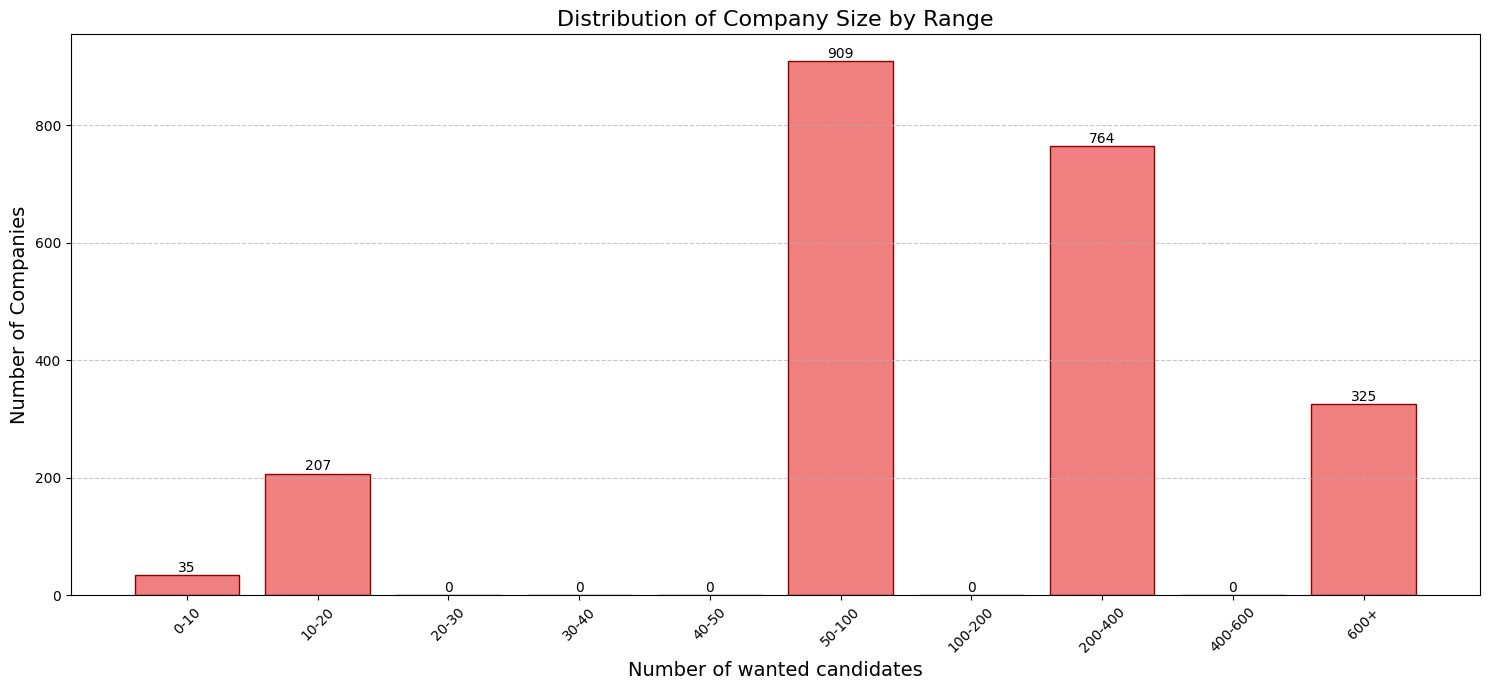

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the company size ranges
size_bins = [0, 10, 20, 30, 40, 50, 100, 200, 400, 600, float('inf')]
size_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-400', '400-600', '600+']

# Categorize the company sizes
df['Size_Range'] = pd.cut(df['Company_Size_Numeric'], bins=size_bins, labels=size_labels)

# Count the occurrences of each size range
size_counts = df['Size_Range'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(15, 7))
bars = plt.bar(size_counts.index, size_counts.values, color='lightcoral', edgecolor='darkred')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.1, 
        f'{height:.0f}', 
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Distribution of Company Size by Range', fontsize=16)
plt.xlabel('Number of employees', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

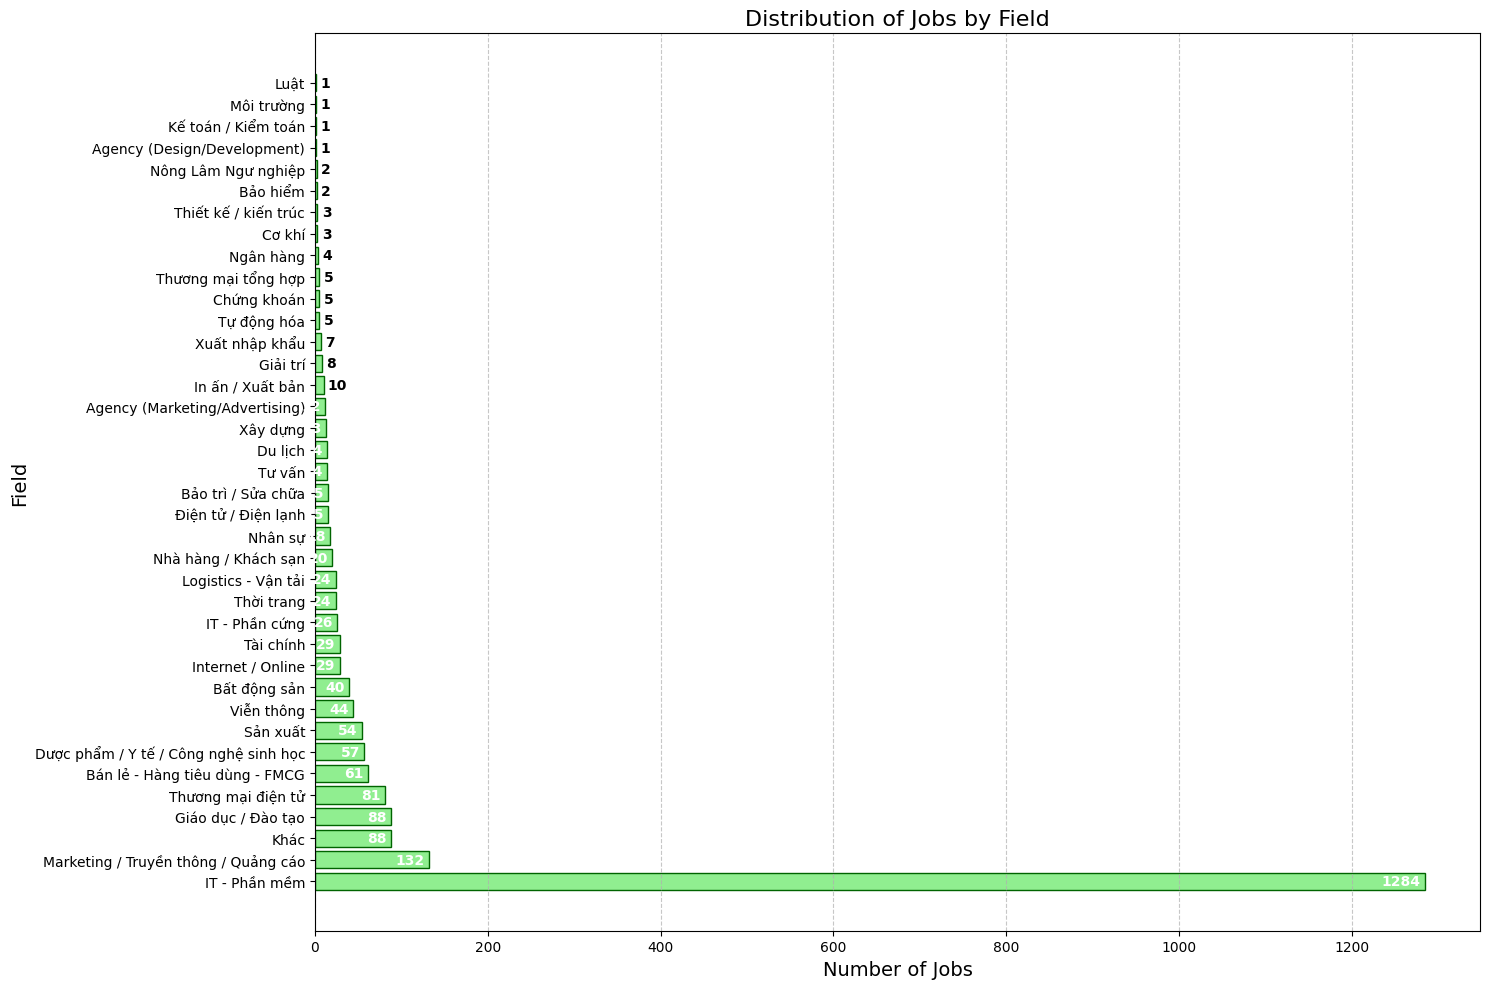

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each field
field_counts = df['Field'].value_counts()

# Alternative: Create a horizontal bar chart for better readability
plt.figure(figsize=(15, 10))
bars = plt.barh(field_counts.index, field_counts.values, color='lightgreen', edgecolor='darkgreen')

# Add value labels inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 5 if width > 10 else width + 5, 
        bar.get_y() + bar.get_height()/2,
        f'{width:.0f}',
        ha='right' if width > 10 else 'left',
        va='center',
        color='white' if width > 10 else 'black',
        fontweight='bold'
    )

plt.title('Distribution of Jobs by Field', fontsize=16)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Field', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()